This notebook uses utility functions from utils.pv_utils to read in and preprocess the pv data for eda. To run this notebook, first change the filepath to a location on your machine.

In [82]:
from math import e
from matplotlib import pyplot as plt

import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import logging
logging.basicConfig(level=logging.INFO)

pio.renderers.default = "vscode"
FILEPATH = './../data'

In [7]:
def read_files(path: str):
    """
    Reads in hdf5 file and two metadata csvs from local given a path. The csvs are returned as dataframes.
    """
    if not os.path.exists(path):
        raise FileNotFoundError('file path does not exist')

    file_info = ['', None, None]

    for file in os.listdir(path):

        if file.endswith('.hdf'):
            file_info[0] = path + '/' + file

        elif file.endswith('.csv'):
            if 'metadata' in file:
                file_info[1] = pd.read_csv(path + '/' + file, index_col=1)
            else:
                file_info[2] = pd.read_csv(path + '/' + file, index_col=0)

    return file_info

In [8]:
def open_hdf(path, key):
    """
    :param path:
    :param key:
    :return:
    """

    # with pd.HDFStore(hdf_path) as hdf:
    #     keys = hdf.keys()
    #
    # for counter, key in enumerate(keys):
    #     logging.info(f"Reading {key}: {counter} out of {len(keys)}")

    # if counter == 0:
    return pd.read_hdf(path, key)

The Italy PV data is stored across three files. Two files are csvs that contain metadata such as the names of the solar production sites, their geographical location, output capacity, and panel install dates. The third file contains the time series PV output data and is stored in hdf5 format. The tables can be joined on the name and system_id columns to provide a complete picture of the data.

In [9]:
hdf_path, metadata_df, systems_df = read_files(FILEPATH)

The hdf file contains 436 unique keys, mostly representing PV system IDs.

The first key has information regarding missing values in the dataset. Each entry has a unique pv_system_id, and a range of dates where PV output data is unavailable. Some PV sites have missing values over multiple periods, such as #39321.

In [10]:
with pd.HDFStore(path=hdf_path) as hdf:
    keys = hdf.keys()

print(f"Length of keys: {len(keys)}")
print(f"Length of keys[0]: {len(keys[0])}")

pd.read_hdf(hdf_path, keys[0]).head()

Length of keys: 436
Length of keys[0]: 14


,missing_start_date_PV_localtime,missing_end_date_PV_localtime,datetime_of_API_request
pv_system_id,,,
79743,2019-10-29,2020-10-28,2022-10-18 10:40:41.552556+00:00
53062,2016-11-22,2017-11-22,2022-10-18 10:40:42.722667+00:00
39321,2021-03-02,2022-03-02,2022-10-18 10:40:44.014447+00:00
39321,2020-03-02,2021-03-02,2022-10-18 10:40:44.512846+00:00
39321,2020-02-18,2020-02-23,2022-10-18 10:40:45.009075+00:00


In [28]:
pd.read_hdf(hdf_path, keys[0])

,missing_start_date_PV_localtime,missing_end_date_PV_localtime,datetime_of_API_request
pv_system_id,,,
79743,2019-10-29,2020-10-28,2022-10-18 10:40:41.552556+00:00
53062,2016-11-22,2017-11-22,2022-10-18 10:40:42.722667+00:00
39321,2021-03-02,2022-03-02,2022-10-18 10:40:44.014447+00:00
39321,2020-03-02,2021-03-02,2022-10-18 10:40:44.512846+00:00
39321,2020-02-18,2020-02-23,2022-10-18 10:40:45.009075+00:00
...,...,...,...
49439,2018-06-14,2018-06-14,2022-10-20 09:06:17.675130+00:00
49439,2018-06-29,2018-06-29,2022-10-20 09:06:17.675130+00:00
49439,2018-07-14,2018-07-14,2022-10-20 09:06:17.675130+00:00


The second key contains general statistics for the dataset, such as average efficiency, total generated energy, and average daily generated energy for each PV site.

In [11]:
print(f"Length of keys[1]: {len(keys[1])}")

pd.read_hdf(hdf_path, keys[1]).head()

Length of keys[1]: 11


,minimum_daily_energy_gen_Wh,energy_exported_Wh,total_energy_gen_Wh,average_efficiency_kWh_per_kW,num_outputs,record_efficiency_kWh_per_kW,average_daily_energy_gen_Wh,maximum_daily_energy_gen_Wh,actual_date_from,actual_date_to,record_efficiency_date,query_date_from,query_date_to
26707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,2022-10-18 10:40:39.533919
25703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,2022-10-18 10:40:40.229001
42890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaT,2022-10-18 10:40:40.886383
79743,5500.0,185400.0,185500.0,0.242,2.0,3600.000000,92750.0,180000.0,2020-10-27,2020-10-28,2020-10-28,NaT,2022-10-18 10:40:41.539337
53062,0.0,0.0,36843800.0,1.150,107.0,26367.859375,344334.0,1318393.0,2017-07-04,2017-11-22,2017-09-07,NaT,2022-10-18 10:40:42.709447


The remaining 434 keys each refer to a unique PV site. Before diving into the time series data, let's take a look at the metadata files.

In [12]:
metadata_df.head()

,Unnamed: 0,system_DC_capacity_W,address,num_panels,panel_capacity_W_each,panel_brand,num_inverters,inverter_capacity_W,inverter_brand,orientation,...,shade,install_date,latitude,longitude,status_interval_minutes,secondary_num_panels,secondary_panel_capacity_W_each,secondary_orientation,secondary_array_tilt_degrees,system_id
name,,,,,,,,,,,,,,,,,,,,,
Pergola Fotovoltaica,0,9165,NaN,39,235,LG,1,10000,Power One PVI 10.0 OUTD-S,SE,...,No,2011-02-28,36.715286,15.091528,5,0,0,NaN,NaN,24000
Saiazza,1,14000,96018.0,70,200,Deluxe,1,12500,Aurora,S,...,No,NaN,36.718600,15.090700,5,0,0,NaN,NaN,48316
Tetto Fotovoltaico Saiazza,2,14000,96018.0,70,200,Deluxe,1,12500,Aurora,S,...,No,NaN,36.718600,15.090700,5,0,0,NaN,NaN,41556
Scalecci,3,13230,96017.0,63,210,Centrosolar,1,12500,Power One PVI 12.5 OUTD FS,SE,...,No,2013-02-25,36.734759,15.098036,5,0,0,NaN,NaN,24001
Marzamemi-FV,4,2990,96017.0,13,230,LG 230W,1,3000,Power One Aurora PVI 3.0,SW,...,Medium,2011-04-28,36.747195,15.108724,5,0,0,NaN,NaN,24760


In [13]:
systems_df.head()

,name,system_DC_capacity_W,address,orientation,num_outputs,last_output,panel,inverter,distance_km,latitude,longitude
system_id,,,,,,,,,,,
24000,Pergola Fotovoltaica,9165,Italy,SE,4204,Yesterday,LG,Power One PVI 10.0 OUTD-S,16.6,36.715286,15.091528
48316,Saiazza,14000,Italy 96018,S,703,120 weeks ago,Deluxe,Aurora,17.0,36.718600,15.090700
41556,Tetto Fotovoltaico Saiazza,14000,Italy 96018,S,680,299 weeks ago,Deluxe,Aurora,17.0,36.718600,15.090700
24001,Scalecci,13230,Italy 96017,SE,3233,Yesterday,Centrosolar,Power One PVI 12.5 OUTD FS,18.4,36.734759,15.098036
24760,Marzamemi-FV,2990,Italy 96017,SW,3812,Yesterday,LG 230W,Power One Aurora PVI 3.0,19.4,36.747195,15.108724


Where are the PV sites located? The metadata contains latitude and longitude for each PV site.

In [14]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, Pergola Fotovoltaica to Solaranlage A.Hoermann
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1325 non-null   int64  
 1   system_DC_capacity_W             1325 non-null   int64  
 2   address                          1166 non-null   float64
 3   num_panels                       1325 non-null   int64  
 4   panel_capacity_W_each            1325 non-null   int64  
 5   panel_brand                      1128 non-null   object 
 6   num_inverters                    1325 non-null   int64  
 7   inverter_capacity_W              1325 non-null   int64  
 8   inverter_brand                   1324 non-null   object 
 9   orientation                      1325 non-null   object 
 10  array_tilt_degrees               959 non-null    float64
 11  shade                            1325 non-null   o

In [15]:
metadata_df['label'] = metadata_df['system_id'].apply(lambda s: str(s)) + ": " + metadata_df.index

In [16]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, Pergola Fotovoltaica to Solaranlage A.Hoermann
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1325 non-null   int64  
 1   system_DC_capacity_W             1325 non-null   int64  
 2   address                          1166 non-null   float64
 3   num_panels                       1325 non-null   int64  
 4   panel_capacity_W_each            1325 non-null   int64  
 5   panel_brand                      1128 non-null   object 
 6   num_inverters                    1325 non-null   int64  
 7   inverter_capacity_W              1325 non-null   int64  
 8   inverter_brand                   1324 non-null   object 
 9   orientation                      1325 non-null   object 
 10  array_tilt_degrees               959 non-null    float64
 11  shade                            1325 non-null   o

In [17]:
metadata_df.head()

,Unnamed: 0,system_DC_capacity_W,address,num_panels,panel_capacity_W_each,panel_brand,num_inverters,inverter_capacity_W,inverter_brand,orientation,...,install_date,latitude,longitude,status_interval_minutes,secondary_num_panels,secondary_panel_capacity_W_each,secondary_orientation,secondary_array_tilt_degrees,system_id,label
name,,,,,,,,,,,,,,,,,,,,,
Pergola Fotovoltaica,0,9165,NaN,39,235,LG,1,10000,Power One PVI 10.0 OUTD-S,SE,...,2011-02-28,36.715286,15.091528,5,0,0,NaN,NaN,24000,24000: Pergola Fotovoltaica
Saiazza,1,14000,96018.0,70,200,Deluxe,1,12500,Aurora,S,...,NaN,36.718600,15.090700,5,0,0,NaN,NaN,48316,48316: Saiazza
Tetto Fotovoltaico Saiazza,2,14000,96018.0,70,200,Deluxe,1,12500,Aurora,S,...,NaN,36.718600,15.090700,5,0,0,NaN,NaN,41556,41556: Tetto Fotovoltaico Saiazza
Scalecci,3,13230,96017.0,63,210,Centrosolar,1,12500,Power One PVI 12.5 OUTD FS,SE,...,2013-02-25,36.734759,15.098036,5,0,0,NaN,NaN,24001,24001: Scalecci
Marzamemi-FV,4,2990,96017.0,13,230,LG 230W,1,3000,Power One Aurora PVI 3.0,SW,...,2011-04-28,36.747195,15.108724,5,0,0,NaN,NaN,24760,24760: Marzamemi-FV


It seems like the sites are fairly well dispersed through mainland Italy, Sicily, and Sardegna. Note that I've log-transformed the system capacity to better fit the scale.

In [18]:
fig = go.Figure(
    data=go.Scattergeo(
        lon = metadata_df['longitude'],
        lat = metadata_df['latitude'],
        text = metadata_df['label'],
        mode = 'markers',

        marker = dict(
            size = 3,
            opacity = 0.8,
            autocolorscale = True,
            symbol = 'square',
            cmin = 0,
            color = metadata_df['system_DC_capacity_W'].apply(lambda x: np.log(x)),
            cmax = metadata_df['system_DC_capacity_W'].apply(lambda x: np.log(x)).max(),
            colorbar_title = "System Capacity [log(W)]"
        )
    )
)

#fig.update_geos(lataxis_range=[35,50], lonaxis_range=[5, 20])
fig.update_geos(fitbounds="locations")

fig.update_layout(title = 'Italian PV Sites')

It seems like the sites are fairly well dispersed through mainland Italy, Sicily, and Sardegna.

My personal favourite PV site is #64384: best_system_ever

In [19]:
metadata_df.loc['best_system_ever']

Unnamed: 0                                            1318
system_DC_capacity_W                                 25000
address                                            39027.0
num_panels                                             100
panel_capacity_W_each                                  250
panel_brand                                        Chinese
num_inverters                                            1
inverter_capacity_W                                  25000
inverter_brand                                         SMA
orientation                                              S
array_tilt_degrees                                    30.0
shade                                                   No
install_date                                    2019-01-14
latitude                                           46.8333
longitude                                          10.5167
status_interval_minutes                                  5
secondary_num_panels                                    

To explore the time series for individual PV sites, we can query the hdf file for the key associated with that site.

In [20]:
pd.read_hdf(hdf_path, key=keys[2]).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508549 entries, 2012-08-07 15:00:00 to 2022-10-01 19:15:00
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   cumulative_energy_gen_Wh   508549 non-null  float64            
 1   instantaneous_power_gen_W  508549 non-null  float64            
 2   temperature_C              318808 non-null  float64            
 3   voltage                    508549 non-null  float64            
 4   datetime_of_API_request    508549 non-null  datetime64[ns, UTC]
 5   query_date                 508549 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4)
memory usage: 27.2 MB


In [21]:
print(f"Length of keys[2]: {len(keys[2])}")

pd.read_hdf(hdf_path, keys[2]).describe()

Length of keys[2]: 17


,cumulative_energy_gen_Wh,instantaneous_power_gen_W,temperature_C,voltage
count,508549.000000,508549.000000,318808.000000,508549.000000
mean,9085.747926,1208.946772,24.675300,232.385821
std,7950.387766,1083.821712,13.769733,4.947033
min,0.000000,0.000000,-8.900000,182.000000
25%,1780.000000,222.000000,15.100000,230.000000
50%,7114.000000,861.000000,22.500000,233.000000
75%,15346.000000,2140.000000,30.800000,236.000000
max,29838.000000,4650.000000,81.500000,263.000000


For preprocessing purposes, we can enumerate over all keys, combining all into one dataframe. Then we can save in xarray or netCDF format, and upload to Google Cloud.

In [22]:
for counter, key in enumerate(keys[2:]):
    logging.info(f"Reading {key}: {counter} out of {len(keys)}")

    # read in a key

    # do some preprocessing

    # combine into one dataframe


# save to local and/or GCP

INFO:root:Reading /timeseries/10441: 0 out of 436
INFO:root:Reading /timeseries/10708: 1 out of 436
INFO:root:Reading /timeseries/10878: 2 out of 436
INFO:root:Reading /timeseries/10897: 3 out of 436
INFO:root:Reading /timeseries/10970: 4 out of 436
INFO:root:Reading /timeseries/10979: 5 out of 436
INFO:root:Reading /timeseries/10997: 6 out of 436
INFO:root:Reading /timeseries/11017: 7 out of 436
INFO:root:Reading /timeseries/11080: 8 out of 436
INFO:root:Reading /timeseries/11126: 9 out of 436
INFO:root:Reading /timeseries/11175: 10 out of 436
INFO:root:Reading /timeseries/11176: 11 out of 436
INFO:root:Reading /timeseries/11177: 12 out of 436
INFO:root:Reading /timeseries/11178: 13 out of 436
INFO:root:Reading /timeseries/11182: 14 out of 436
INFO:root:Reading /timeseries/12415: 15 out of 436
INFO:root:Reading /timeseries/12499: 16 out of 436
INFO:root:Reading /timeseries/12822: 17 out of 436
INFO:root:Reading /timeseries/1293: 18 out of 436
INFO:root:Reading /timeseries/13278: 19 ou

# Some EDA that would be helpful
1) Read in the data from a few PV sites, plotting the data on a daily, weekly and yearly scale (i.e. pick an arbitrary, day, week and year to plot)
2) Take a look at the correlation between panel temperature and PV output. Is the temp column useful? It has missing values, so if it isn't useful we will just drop it (you can likely use a method like df.corr() for this)
3) Try dividing instantaneous PV output for a PV site by its system capacity (found in metadata file). This should give a measure from 0-1 of how close the system is operating to its capacity at any given time. Maybe plot this metric over a day/week/year and look for any erroneous values that are -'ve or > 1.0
4) Let's try to find what % of the dataset is missing or NA. Missing data is described in the HDF file under the /missing key.

If for whatever reason a time series is not at 5-min intervals, you can resample it using df = df.resample("5T").mean()



#3 -- Dviding instantaneous PV output for a PV site by its system capacity

    - System capacity in metadata_df

In [26]:
metadata_df['system_DC_capacity_W']

name
Pergola Fotovoltaica            9165
Saiazza                        14000
Tetto Fotovoltaico Saiazza     14000
Scalecci                       13230
Marzamemi-FV                    2990
                               ...  
Test 11                           50
OptisolarSos                    1000
sonneundsee                     5280
DV                            382200
Solaranlage A.Hoermann          8000
Name: system_DC_capacity_W, Length: 1325, dtype: int64

In [30]:
mean = metadata_df['system_DC_capacity_W'].mean()

print(mean)

10170.01283018868


In [43]:
max_value = metadata_df['system_DC_capacity_W'].max()
min_value = metadata_df['system_DC_capacity_W'].min()

min_value, max_value

(50, 993600)

In [37]:
def sigmoid(input: int):
    mean = metadata_df['system_DC_capacity_W'].mean()

    output = 1 / (1 + e ** ((-1 / mean) * (input - mean)))

    return output

In [41]:
print(sigmoid(14000))

0.5930518620457453


<AxesSubplot:xlabel='name'>

c:\Users\Mihir\anaconda3\envs\watai\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128 (\x80) missing from current font.

c:\Users\Mihir\anaconda3\envs\watai\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 153 (\x99) missing from current font.



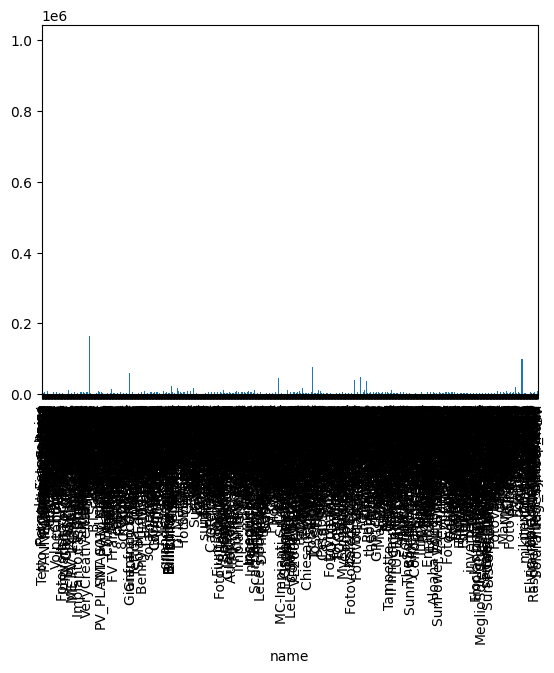

In [42]:
metadata_df['system_DC_capacity_W'].plot.bar()

I know this graph looks really ugly but it show's that the values are pretty uniformed with a couple of outliers. 

In [46]:
arr = metadata_df['system_DC_capacity_W']
count, division = np.histogram(arr, bins=[0, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 993600])
print(count, division)

[770 396  81  19   5  17   7   2   2   2  24] [     0   5000  10000  20000  30000  40000  50000  60000  70000  80000
  90000 993600]


Looks like a lot of our data falls under the 0 - 5000 range. Let's try this again but split the 0 - 20000 interval into smaller sub intervals.

In [77]:
def split_into_intervals(interval_size: int, max_range: int):
    value = 0
    intervals = np.array([])

    for i in range(0, int(max_range / interval_size)):
        intervals = np.insert(intervals, len(intervals), value)
        value += interval_size

    intervals = np.insert(intervals, len(intervals), value)

    return intervals

In [80]:
intervals = split_into_intervals(500, 20000)
count, division = np.histogram(arr, bins=intervals)
print(count, division)

[119  24  15  16  18 181 135  66  90 106  79 110 130  18   7   9   8  12
  14   9   9  10   3   5   7   6   1   1   8   5   2   0   0   5   1   0
   0   1   4  17] [    0.   500.  1000.  1500.  2000.  2500.  3000.  3500.  4000.  4500.
  5000.  5500.  6000.  6500.  7000.  7500.  8000.  8500.  9000.  9500.
 10000. 10500. 11000. 11500. 12000. 12500. 13000. 13500. 14000. 14500.
 15000. 15500. 16000. 16500. 17000. 17500. 18000. 18500. 19000. 19500.
 20000.]


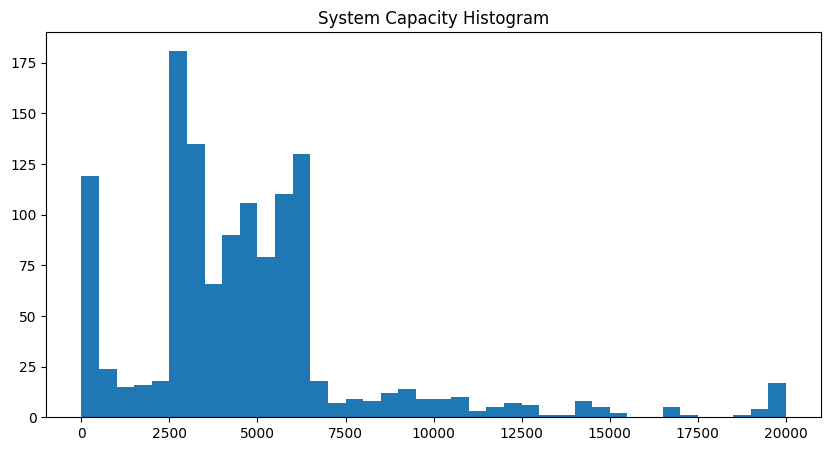

In [92]:
fig = plt.figure(figsize =(10, 5))
plt.hist(arr, bins=division)
plt.title("System Capacity Histogram")
plt.show()

In [94]:
intervals = split_into_intervals(10000, 1000000)
count, division = np.histogram(arr, bins=intervals)
print(count, division)

[1166   81   19    5   17    7    2    2    2    9    2    0    1    0
    2    1    2    0    0    1    0    0    0    0    0    0    0    1
    0    1    0    0    0    0    0    0    0    0    2    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1    0    0    0
    0    1] [      0.   10000.   20000.   30000.   40000.   50000.   60000.   70000.
   80000.   90000.  100000.  110000.  120000.  130000.  140000.  150000.
  160000.  170000.  180000.  190000.  200000.  210000.  220000.  230000.
  240000.  250000.  260000.  270000.  280000.  290000.  300000.  310000.
  320000.  330000.  340000.  350000.  360000.  370000.  380000.  390000.
  400000.  410000.  420000.  430000.  440000.  450000.  460000.  470000.
  480000.  490000.  500000.  510000.  520000.  530000

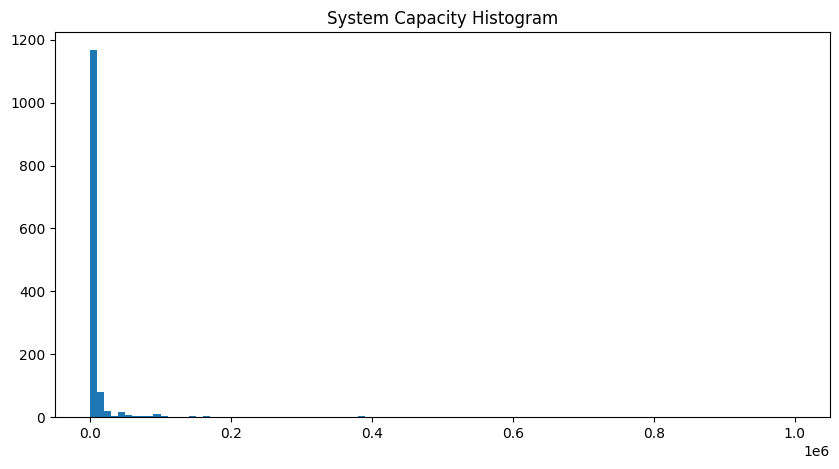

In [95]:
fig = plt.figure(figsize =(10, 5))
plt.hist(arr, bins=intervals)
plt.title("System Capacity Histogram")
plt.show()

Task #4

In [96]:
print(keys)

['/missing_dates', '/statistics', '/timeseries/10441', '/timeseries/10708', '/timeseries/10878', '/timeseries/10897', '/timeseries/10970', '/timeseries/10979', '/timeseries/10997', '/timeseries/11017', '/timeseries/11080', '/timeseries/11126', '/timeseries/11175', '/timeseries/11176', '/timeseries/11177', '/timeseries/11178', '/timeseries/11182', '/timeseries/12415', '/timeseries/12499', '/timeseries/12822', '/timeseries/1293', '/timeseries/13278', '/timeseries/13440', '/timeseries/13593', '/timeseries/13915', '/timeseries/14043', '/timeseries/14258', '/timeseries/1452', '/timeseries/15052', '/timeseries/15248', '/timeseries/15293', '/timeseries/15417', '/timeseries/15837', '/timeseries/1587', '/timeseries/16020', '/timeseries/1612', '/timeseries/16185', '/timeseries/16186', '/timeseries/16187', '/timeseries/16188', '/timeseries/16189', '/timeseries/16190', '/timeseries/16191', '/timeseries/16192', '/timeseries/16254', '/timeseries/16393', '/timeseries/16844', '/timeseries/17221', '/ti

In [97]:
print(len(keys))

436


In [100]:
for key in range(len(keys)):
    print(keys[key])

/missing_dates
/statistics
/timeseries/10441
/timeseries/10708
/timeseries/10878
/timeseries/10897
/timeseries/10970
/timeseries/10979
/timeseries/10997
/timeseries/11017
/timeseries/11080
/timeseries/11126
/timeseries/11175
/timeseries/11176
/timeseries/11177
/timeseries/11178
/timeseries/11182
/timeseries/12415
/timeseries/12499
/timeseries/12822
/timeseries/1293
/timeseries/13278
/timeseries/13440
/timeseries/13593
/timeseries/13915
/timeseries/14043
/timeseries/14258
/timeseries/1452
/timeseries/15052
/timeseries/15248
/timeseries/15293
/timeseries/15417
/timeseries/15837
/timeseries/1587
/timeseries/16020
/timeseries/1612
/timeseries/16185
/timeseries/16186
/timeseries/16187
/timeseries/16188
/timeseries/16189
/timeseries/16190
/timeseries/16191
/timeseries/16192
/timeseries/16254
/timeseries/16393
/timeseries/16844
/timeseries/17221
/timeseries/17538
/timeseries/17581
/timeseries/17603
/timeseries/17610
/timeseries/17658
/timeseries/17888
/timeseries/18350
/timeseries/18390
/time

In [102]:
missing_length = len(keys[0])

print(missing_length)

14


In [104]:
counter = 0

for key in range(len(keys)):
    counter += len(keys[key])

print(counter)

7360


In [108]:
missing_percentage = (missing_length / counter) 

print(f"Missing percentage: {missing_percentage * 100}%")

Missing percentage: 0.19021739130434784%
